In [2]:
import requests
#defining apikey and rootURL
apikey="?apiKey=bc34214bb68b4c869d1bbc4eb192ef67"
rootURL="https://api.covidactnow.org/v2/states.json"
COV_data=requests.get(rootURL+apikey)

#checing for the typ«e of data, to see if i'm in the right direction
type(COV_data)

requests.models.Response

In [23]:

max_cases = 0
state_with_max_cases = ''

for state in covdat:
    cases = state["actuals"]["cases"]
    if cases > max_cases:
        max_cases = cases
        state_with_max_cases = state["state"]

# Print the state with the most cases
print(state_with_max_cases)


CA


In [34]:

min_cases = covdat[0]["actuals"]["cases"]
#assigning the first state cases as default and cintrasting based on that 
state_with_min_cases = ''
#empty string
for state in covdat:
    cases = state["actuals"]["cases"]
    if cases < min_cases:
        min_cases = cases
        state_with_min_cases = state['state']

# Print the state with the lowest number of cases
print(state_with_min_cases)

MP


In [3]:
covdat=COV_data.json()
covdat

[{'fips': '02',
  'country': 'US',
  'state': 'AK',
  'county': None,
  'hsa': None,
  'hsaName': None,
  'level': 'state',
  'lat': None,
  'locationId': 'iso1:us#iso2:us-ak',
  'long': None,
  'population': 731545,
  'hsaPopulation': None,
  'metrics': {'testPositivityRatio': 0.075,
   'testPositivityRatioDetails': {'source': 'other'},
   'caseDensity': 3.7,
   'weeklyNewCasesPer100k': 25.7,
   'contactTracerCapacityRatio': None,
   'infectionRate': 0.7,
   'infectionRateCI90': 0.27,
   'icuCapacityRatio': 0.72,
   'bedsWithCovidPatientsRatio': 0.019,
   'weeklyCovidAdmissionsPer100k': 4.5,
   'vaccinationsInitiatedRatio': 0.732,
   'vaccinationsCompletedRatio': 0.653,
   'vaccinationsAdditionalDoseRatio': 0.325,
   'vaccinationsFall2022BivalentBoosterRatio': 0.141},
  'riskLevels': {'overall': 1,
   'testPositivityRatio': 1,
   'caseDensity': 1,
   'contactTracerCapacityRatio': 4,
   'infectionRate': 0,
   'icuCapacityRatio': 1},
  'cdcTransmissionLevel': 1,
  'communityLevels': {'c

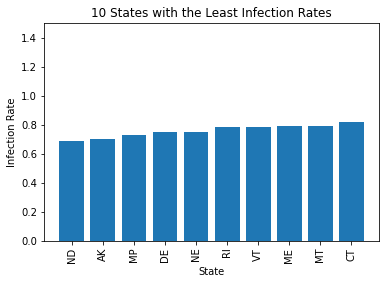

In [7]:

sorted_data = sorted(covdat, key=lambda x: x['metrics']['infectionRate'])

# Extract the 20 states with the least infection rates
least_10_states = sorted_data[:10]

# Plot a histogram of infection rates
import matplotlib.pyplot as plt

infection_rates = [state['metrics']['infectionRate'] for state in least_10_states]
state_names = [state['state'] for state in least_10_states]

plt.bar(state_names, infection_rates)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Infection Rate')
plt.title('10 States with the Least Infection Rates')
plt.ylim(0, 1.5)
plt.show()
#plt.savefig("lowIfRateState.png",format="png")





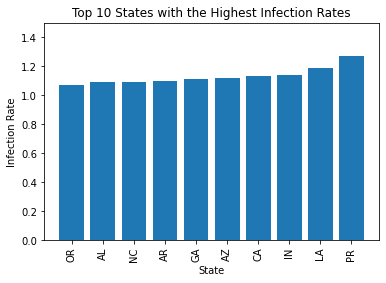

<Figure size 432x288 with 0 Axes>

In [161]:
state_data = [(state['state'], state['metrics']['infectionRate']) for state in covdat]

# sort the data by infection rate in ascending order
sorted_data = sorted(state_data, key=lambda x: x[1])#

# extract the top 20 states with the highest infection rates
top_20 = sorted_data[-10:]

# extracting the state names and infection rates separately
states = [state[0] for state in top_20]
infection_rates = [state[1] for state in top_20]

# create the histogram
plt.bar(states, infection_rates)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Infection Rate')
plt.title('Top 10 States with the Highest Infection Rates')
plt.ylim(0, 1.5)
plt.show()
#plt.savefig("highInfRateStates.jpeg")

CA


In [5]:
for state in covdat:
    cases = state['actuals']['cases']
    
sorted_states = sorted(covdat, key=lambda x: x['actuals']['cases'])

    

for state in sorted_states[:10]:
    name = state['state']
    cases = state['actuals']['cases']
    print(f'{name}: {cases}')

MP: 13858
VT: 154169
DC: 178829
WY: 186685
SD: 282679
ND: 290687
AK: 297389
ME: 322720
DE: 333738
MT: 333759


In [48]:
#as expected the least cases were on orthern 

In [4]:

sorted_states = sorted(covdat, key=lambda x: x['metrics']['infectionRate'],reverse=True)
infection_rate_threshold = sorted_states[10]['metrics']['infectionRate']
#names=sorted(covdat, key=lambda x: x['state'],reverse=True)
i = 0
#use sorted_states[-10] to get the 10th element from the end of the sorted list.
while sorted_states[i]['metrics']['infectionRate'] >= infection_rate_threshold:
    name = sorted_states[i]['state']
    infection_rate = sorted_states[i]['metrics']['infectionRate']
    print(f'{name}: {infection_rate}')

    i += 1
    #i+= 1 to say to go to the next iteration of the list


PR: 1.27
LA: 1.19
IN: 1.14
CA: 1.13
AZ: 1.12
GA: 1.11
AR: 1.1
AL: 1.09
NC: 1.09
MS: 1.07
OR: 1.07


In [193]:

#infection rates of the least 10 states
#least_10states is in the cell after covdat varibale loading the json
for state in least_10_states:
    name = state['state']
    infection_rate = state['metrics']['infectionRate']
    print(f'{name}: {infection_rate}')

MP: 0.82
WV: 0.82
ND: 0.83
PA: 0.85
NE: 0.9
AK: 0.91
NJ: 0.93
WI: 0.93
OH: 0.94
KS: 0.95


In [34]:

#importing 3 csv containg labor metric of Q42019,Q32020,Q32022
import pandas as pd
from bs4 import BeautifulSoup
Q3idata20=pd.read_csv("Q32020goodsproducingwage.csv")
Q4idata19=pd.read_csv("Q42019goodsproducewage.csv")
Q3idata22=pd.read_csv("Q32022goodsproducewage.csv")

****Quarter 4 of 2019****

In [167]:
Q42019=Q4idata19[["Area Name","Employment","Average Weekly Wages","USPS"]].sort_values("Average Weekly Wages",ascending=False)
Q32020=Q3idata20[["Area Name","Employment","Average Weekly Wages","USPS"]].sort_values("Average Weekly Wages",ascending=False)
Q32022=Q3idata22[["Area Name","Employment","Average Weekly Wages","USPS"]].sort_values("Average Weekly Wages",ascending=False)
#looking at employment isnt really that great of a factor since the value depnds on the states population, hence we should only look at 
#the same state through different times to see some contrast in employment

In [136]:
#poorest wages for states before covid

Q42019.iloc[-10:]



,Area Name,Employment,Average Weekly Wages,USPS
40,South Carolina,377721,1169,SC
44,Utah,263986,1167,UT
9,Florida,1036274,1147,FL
45,Vermont,49562,1125,VT
19,Maine,90832,1093,ME
27,Nebraska,170120,1091,NE
41,South Dakota,74801,1027,SD
24,Mississippi,208430,1015,MS
3,Arkansas,231450,1011,AR
51,Puerto Rico,115937,671,PR


In [116]:
#top 10 highest earning states in Q4 of 2019 before covid
Q42019.head(10)
#we'll use the  20 states through different years to see how it pans out through the whole of COVID

,Area Name,Employment,Average Weekly Wages,USPS
52,Virgin Islands,6036,1914,VI
1,Alaska,36238,1799,AK
21,Massachusetts,416769,1707,MA
4,California,2583738,1674,CA
6,Connecticut,224099,1631,CT
43,Texas,1986540,1585,TX
8,District Of Columbia,15843,1568,DC
30,New Jersey,420171,1562,NJ
34,North Dakota,78221,1471,ND
32,New York,861519,1467,NY


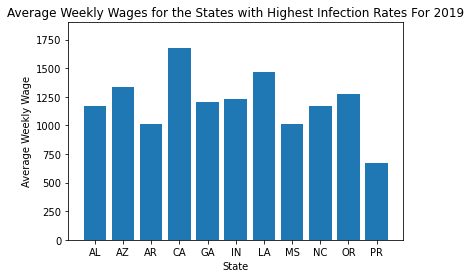

In [199]:
high_inf_states = ['PR', 'LA', 'IN', 'CA', 'AZ', 'GA', 'AR', 'AL', 'NC', 'MS', 'OR']
filtered_df_high19 = Q4idata19[Q4idata19['USPS'].isin(high_inf_states)]

# Plot the data
plt.bar(filtered_df_high19['USPS'], filtered_df_high19['Average Weekly Wages'])
plt.xlabel('State')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wages for the States with Highest Infection Rates For 2019')
plt.ylim(0,1900)
plt.show()
#plt.savefig("2019AvgweekwageTopstates.jpeg")

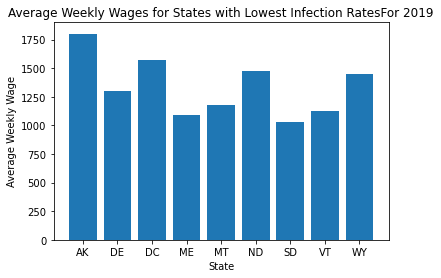

In [194]:
low_inf_states = ['MP', 'VT', 'DC', 'WY', 'SD', 'ND', 'AK', 'ME', 'DE', 'MT']

# Filter the data to only include the states with the lowest infection rates
filtered_df_low19 = Q4idata19[Q4idata19['USPS'].isin(low_inf_states)]

# Plot the data
plt.bar(filtered_df_low19['USPS'], filtered_df_low19['Average Weekly Wages'])
plt.xlabel('State')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wages for States with Lowest Infection RatesFor 2019')
plt.ylim(0,1900)
plt.show()
#plt.savefig("2019AvgweekwageBottomstates.jpeg")

****Quarter 3 of 2020****

In [152]:
#Same for this quarter
#looking at the richest worker states, poorest workers states for good comparison

#10 least earning states in the country by Average weekly wage
Q32020.iloc[-10:]


,Area Name,Employment,Average Weekly Wages
26,Montana,66021,1080
45,Vermont,48088,1079
19,Maine,92447,1077
31,New Mexico,102549,1063
27,Nebraska,169901,1031
12,Idaho,153299,1008
41,South Dakota,76124,996
24,Mississippi,199357,981
3,Arkansas,223590,969
51,Puerto Rico,111550,603


In [153]:
Q32020.head(10)

,Area Name,Employment,Average Weekly Wages
52,Virgin Islands,3877,1734
1,Alaska,42400,1713
21,Massachusetts,401903,1650
4,California,2591990,1564
6,Connecticut,218206,1502
8,District Of Columbia,16487,1466
30,New Jersey,403879,1465
43,Texas,1798485,1437
32,New York,820536,1376
20,Maryland,277563,1366


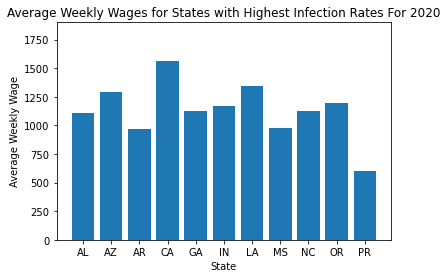

<Figure size 432x288 with 0 Axes>

In [154]:

filtered_df_high20 = Q3idata20[Q3idata20['USPS'].isin(high_inf_states)]

# Plot the data
plt.bar(filtered_df_high20['USPS'], filtered_df_high20['Average Weekly Wages'])
plt.xlabel('State')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wages for States with Highest Infection Rates For 2020')
plt.ylim(0,1900)
plt.show()
plt.savefig("2020AvgweekwageTopstates.jpeg")

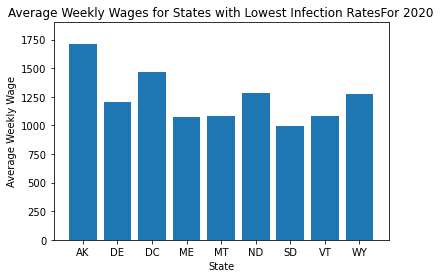

In [198]:


# Filter the data to only include the states with the lowest infection rates
filtered_df_low20 = Q3idata20[Q3idata20['USPS'].isin(low_inf_states)]

# Plot the data
plt.bar(filtered_df_low20['USPS'], filtered_df_low20['Average Weekly Wages'])
plt.xlabel('State')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wages for States with Lowest Infection RatesFor 2020')
plt.ylim(0,1900)
plt.show()

#plt.savefig("2020AvgweekwageBottomstates.jpeg")

**Quarter 3 of 2022**

In [156]:
Q32022=Q3idata22[["Area Name","Employment","Average Weekly Wages"]].sort_values("Average Weekly Wages",ascending=False)
Q32022.iloc[-10:]

,Area Name,Employment,Average Weekly Wages
31,New Mexico,111803,1266
52,Virgin Islands,2541,1263
45,Vermont,49693,1247
27,Nebraska,180187,1209
12,Idaho,169342,1196
19,Maine,97409,1186
41,South Dakota,81155,1164
3,Arkansas,238745,1128
24,Mississippi,208294,1121
51,Puerto Rico,123998,690


In [157]:
Q32022.head(10)

,Area Name,Employment,Average Weekly Wages
1,Alaska,42428,1940
21,Massachusetts,428219,1769
4,California,2771542,1734
8,District Of Columbia,16528,1680
6,Connecticut,225939,1655
43,Texas,1992752,1641
30,New Jersey,429352,1622
5,Colorado,380540,1583
34,North Dakota,79130,1573
20,Maryland,282521,1551


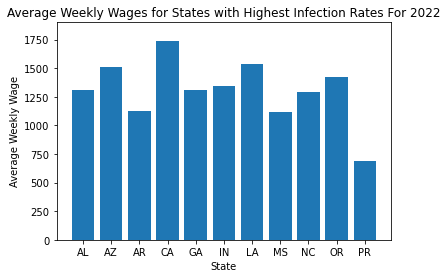

<Figure size 432x288 with 0 Axes>

In [158]:
filtered_df_high22 = Q3idata22[Q3idata22['USPS'].isin(high_inf_states)]

# Plot the data
plt.bar(filtered_df_high22['USPS'], filtered_df_high22['Average Weekly Wages'])
plt.xlabel('State')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wages for States with Highest Infection Rates For 2022')
plt.ylim(0,1900)
plt.show()
plt.savefig("2022AvgweekwageTopstates.jpeg")


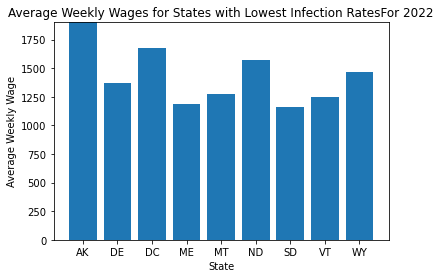

<Figure size 432x288 with 0 Axes>

In [159]:


# Filter the data to only include the states with the lowest infection rates
filtered_df_low22 = Q3idata22[Q3idata22['USPS'].isin(low_inf_states)]

# Plot the data
plt.bar(filtered_df_low22['USPS'], filtered_df_low22['Average Weekly Wages'])
plt.xlabel('State')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wages for States with Lowest Infection RatesFor 2022')
plt.ylim(0,1900)
plt.show()

plt.savefig("2022AvgweekwageBottomstates.jpeg")

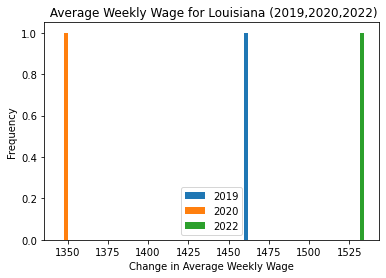

<Figure size 432x288 with 0 Axes>

In [201]:
lou19 = Q42019[Q42019['USPS'] == 'LA']
lou20 = Q32020[Q32020['USPS'] == 'LA']
lou22 = Q32022[Q32022['USPS'] == 'LA']

# Extracting the  weekly wages for each year
wages19_lou = lou19['Average Weekly Wages']
wages20_lou = lou20['Average Weekly Wages']
wages22_lou = lou22['Average Weekly Wages']



# Plot a histogram of the changes in weekly wages
plt.hist([wages19_lou, wages20_lou,wages22_lou], bins=20, label=['2019', '2020','2022'])
plt.xlabel('Change in Average Weekly Wage')
plt.ylabel('Frequency')
plt.title(' Average Weekly Wage for Louisiana (2019,2020,2022)')
plt.legend()
plt.show()
plt.savefig("Caliweekwage.jpeg")

#highest infection rate on mainland


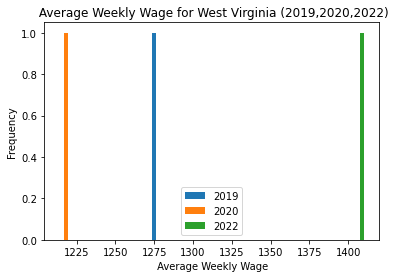

<Figure size 432x288 with 0 Axes>

In [202]:
wv19 = Q42019[Q42019['USPS'] == 'WV']
wv20 = Q32020[Q32020['USPS'] == 'WV']
wv22 = Q32022[Q32022['USPS'] == 'WV']

# Extracting the  weekly wages for each year
wages19_wv = wv19['Average Weekly Wages']
wages20_wv = wv20['Average Weekly Wages']
wages22_wv = wv22['Average Weekly Wages']



# Plot a histogram of the changes in weekly wages
plt.hist([wages19_wv, wages20_wv,wages22_wv], bins=20, label=['2019', '2020','2022'])
plt.xlabel(' Average Weekly Wage')
plt.ylabel('Frequency')
plt.title(' Average Weekly Wage for West Virginia (2019,2020,2022)')
plt.legend()
plt.show()
plt.savefig("Caliweekwage.jpeg")

#highest infection rate on mainland